# Linear Simple

An simple least squares linear regression implemented in STAN.

In [1]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

import pystan

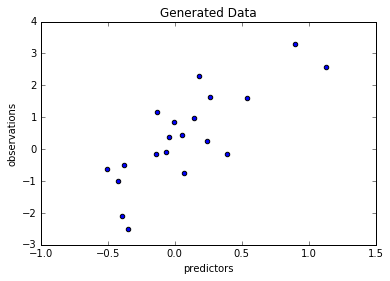

In [15]:
N = 20
l = .5

predictors = l*np.random.randn(N)
noise = np.random.randn(N)

observations = 2. * predictors + noise

fig, ax = plt.subplots(1,1)
ax.set_title('Generated Data')
ax.set_xlabel('predictors')
ax.set_ylabel('observations')
ax.scatter(predictors, observations)
fig.show()

In [5]:
model_code = """
data {
    int N;
    vector[N] x;
    vector[N] y;
}

parameters {
    real beta;
    real alpha;
}

model {
    y ~ normal(beta * x + alpha, 1);
}
"""
model = pystan.StanModel(model_code=model_code)

In [6]:
fit = model.sampling(data=dict(N=N, x=predictors, y=observations))

In [7]:
print fit

Inference for Stan model: anon_model_ce3df646c9eeeb7a750582c66fd1925e.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta    1.38    0.01   0.44    0.5   1.09    1.4   1.67   2.22 1150.0    1.0
alpha   0.09  6.9e-3   0.22  -0.35  -0.07   0.08   0.24   0.53 1046.0    1.0
lp__   -10.6    0.04   0.97 -13.24 -10.97 -10.31   -9.9  -9.66  758.0    1.0

Samples were drawn using NUTS(diag_e) at Thu Mar  3 14:00:48 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [8]:
samples = fit.extract()

In [9]:
alpha = samples['alpha'][:, np.newaxis]
beta  = samples['beta'][:, np.newaxis]
mx  = np.linspace(np.floor(np.min(predictors)) - 1, np.ceil(np.max(predictors)) + 1)
yxx = np.outer(beta, mx) + alpha

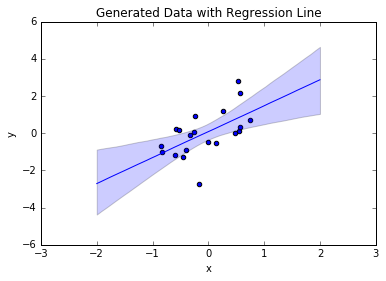

In [12]:
ymed = np.percentile(yxx,   50, axis=0)
ymin = np.percentile(yxx,  2.5, axis=0)
ymax = np.percentile(yxx, 97.5, axis=0)

fig, ax = plt.subplots(1, 1)
ax.set_title('Generated Data with Regression Line')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(predictors, observations)
ax.plot(mx, ymed)
ax.fill_between(mx, ymin, ymax, alpha=0.2)
fig.show()